In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().sum()

723

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

## Data Processing 

In [10]:
#sorts catergorical columns
cator = []
#sorts numerical columns
numer = []

for column in data.columns:
    # if num of unique val are <=10 we consider them as
    #categorical colums
    if data[column].nunique() <= 10:
        #categorical colum here
        cator.append(column)
    else:
        #they're numerical columns
        numer.append(column)

In [11]:
cator

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
numer

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [13]:
data['cp'].unique()

array([0, 1, 2, 3])

convert this into binary vectors, we'll do this for all category columns

In [14]:
cator.remove('sex')
cator.remove('target')
data = pd.get_dummies(data,columns=cator,drop_first=True)
#These columns already have 0's and 1's. Thus we remove them.
#drop_first avoids the dummy variable trap

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Feature Scaling

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


colums age,trestbps, chol, thalach, and oldpeak require feature scaling because they're not in the same scale.Feature scaling allows us to put our features the same scale. Feature scaling is essential to ML algorithms that calculate the distance between data. 
K-nearest neighbor, neural networks, support vector mechines-SVM, linear regresion, and logistic regresson. Machine learning algorithms which don't require feature scaling are non-linear ML algorithms. E.g dicision tree, random forest etc. Any machine learning algorithm that's not distance base does not need feature scaling.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st= StandardScaler()
data[numer] = st.fit_transform(data[numer])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Now, the values are in the same scale.

## Splitting The Dataset Into The Training Set And Test Set

In [20]:
X = data.drop('target', axis=1) #indep variable
y = data['target'] #dependent variable

In [21]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                  test_size= 0.20, 
                                                 random_state= 42)

## Logistic Regression

In [25]:
data.head()
#1 heart disease, 0 null disease

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


our target value is categorical. Thus, this is a classification program; we'll use different classification algorithms and evalute their performance of accuracy and find the best model of this data set.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1 = log_reg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
#to get the accuracy of the prediction
accuracy_score(y_test,y_pred1)

0.7868852459016393

## SVC

Support vector classifier- the advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

In [30]:
from sklearn import svm 

In [31]:
svm = svm.SVC()

In [32]:
svm.fit(X_train,y_train)

SVC()

In [33]:
y_pred2= svm.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

## KNeighbors Classifier 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KNN = KNeighborsClassifier()

Now, train the model as before!

In [37]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

Get a prediction 

In [38]:
y_pred3 =KNN.predict(X_test)

Test the accuracy of the model

In [39]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

By default the k classifier is using n=5; we can provide different values to see which n value provides better accuracy.

In [40]:
score = []
for k in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    y_pred_=KNN.predict(X_test)
    score.append(accuracy_score(y_test,y_pred_))

In [41]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [42]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train,y_train)
y_pred_=KNN.predict(X_test)
accuracy_score(y_test,y_pred_)

0.8032786885245902

## Non-Linear ML Algorithms

Here feature scaling, pre-processing,encoding etc is not required.

In [43]:
data2 = pd.read_csv('heart.csv')
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
data2 = data2.drop_duplicates() 

In [45]:
data2.duplicated().sum()

0

In [46]:
data2.shape

(302, 14)

In [47]:
X = data2.drop('target', axis=1)

In [48]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [49]:
y = data2['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.20,
                                                random_state=42)

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT = DecisionTreeClassifier()

In [53]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred4 = DT.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RFC = RandomForestClassifier()

In [58]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5 =RFC.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

##  Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
GBC = GradientBoostingClassifier()

In [63]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6 = GBC.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

## Compare accuracy score

In [66]:
Final_Data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RFC','GBC'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2), 
                              accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)
                          ]})

In [67]:
Final_Data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.737705
4,RFC,0.836066
5,GBC,0.803279


By this data frame we can see that random forest classifier is the best model for our dataset.

<AxesSubplot:xlabel='Models', ylabel='ACC'>

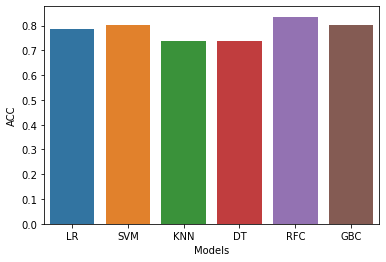

In [68]:
sns.barplot(x=Final_Data['Models'], y=Final_Data['ACC'])

For production we have to train our entire data set on the model. Thus, we train our entire data set on the base model.

In [69]:
X = data2.drop('target', axis=1)
y = data2['target']

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
RFC_ = RandomForestClassifier()

In [72]:
RFC_.fit(X,y)

RandomForestClassifier()

## Prediction on New Data

In [73]:
new_data = pd.DataFrame({'age':52, 'sex': 1,
                        'cp':0,
                        'trestbps':125,
                        'chol': 212,
                        'fbs':0,
                        'restecg':1,
                        'thalach':168,
                        'exang':0,
                        'oldepeak':1.0,
                        'slope':2,
                        'ca':2,
                        'thal':3}, index=[0])

In [74]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldepeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [75]:
P=RFC_.predict(new_data)
if P[0]==0:
    print('No Disease')
else:
    print('Disease')

No Disease


## Save Model Using Joblib

In [76]:
import joblib

In [77]:
joblib.dump(RFC_, 'model_joblib_heart')

['model_joblib_heart']

In [78]:
model = joblib.load('model_joblib_heart')

Now we can perform predictions using our saved model

In [79]:
model.predict(new_data)

array([0])